<a href="https://colab.research.google.com/github/tharungajula2/Portfolio/blob/main/SocialMediavsStress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [ ]:
df = pd.read_csv('3 columns.csv')

In [ ]:
# Inspect the DataFrame
df.head()

,Gender,BSMAS Score,PSS Score
0,Female,6,12
1,Female,8,11
2,Female,9,22
3,Female,9,14
4,Female,9,14


In [ ]:
# Descriptive statistics by gender
df.groupby('Gender').describe()

BSMAS Score                                                      \
             count       mean       std  min    25%   50%    75%   max   
Gender                                                                   
Female        50.0  15.780000  5.304176  6.0  12.25  14.0  20.75  29.0   
Male          49.0  15.469388  5.123890  6.0  12.00  16.0  20.00  25.0   

       PSS Score                                                      
           count       mean       std  min    25%   50%    75%   max  
Gender                                                                
Female      50.0  18.680000  6.052289  5.0  14.25  18.5  22.75  35.0  
Male        49.0  17.408163  6.184383  4.0  14.00  18.0  22.00  32.0

In [ ]:
print(df.columns)

Index(['Gender', 'BSMAS Score', 'PSS Score'], dtype='object')


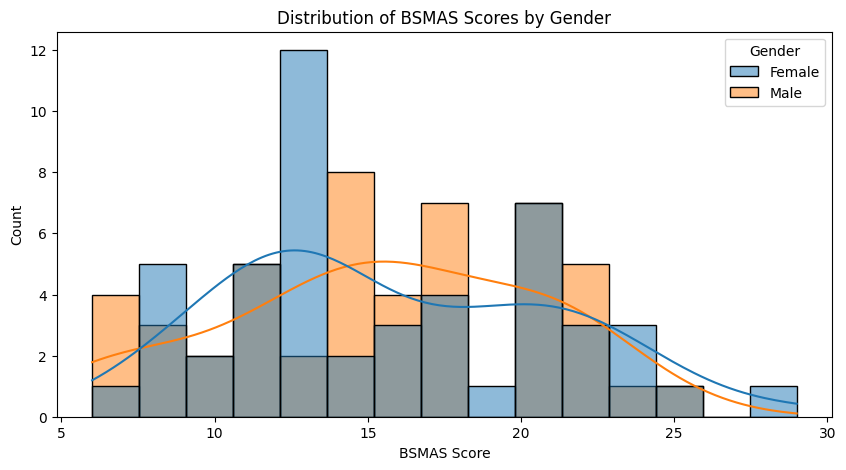

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='BSMAS Score', hue='Gender', bins=15, kde=True)
plt.title('Distribution of BSMAS Scores by Gender')
plt.xlabel('BSMAS Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Overall Pearson and Spearman correlation
pearson_corr, pearson_p = stats.pearsonr(df['BSMAS Score'], df['PSS Score'])
spearman_corr, spearman_p = stats.spearmanr(df['BSMAS Score'], df['PSS Score'])

print(f"Pearson correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")
print(f"Spearman correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

# Correlation by gender
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

# Female correlation
pearson_corr_female, _ = stats.pearsonr(df_female['BSMAS Score'], df_female['PSS Score'])
spearman_corr_female, _ = stats.spearmanr(df_female['BSMAS Score'], df_female['PSS Score'])

# Male correlation
pearson_corr_male, _ = stats.pearsonr(df_male['BSMAS Score'], df_male['PSS Score'])
spearman_corr_male, _ = stats.spearmanr(df_male['BSMAS Score'], df_male['PSS Score'])

print(f"Female - Pearson correlation: {pearson_corr_female:.2f}")
print(f"Female - Spearman correlation: {spearman_corr_female:.2f}")

print(f"Male - Pearson correlation: {pearson_corr_male:.2f}")
print(f"Male - Spearman correlation: {spearman_corr_male:.2f}")


Pearson correlation: 0.38, p-value: 0.0001
Spearman correlation: 0.41, p-value: 0.0000
Female - Pearson correlation: 0.52
Female - Spearman correlation: 0.52
Male - Pearson correlation: 0.24
Male - Spearman correlation: 0.27


In [ ]:
# Simple Linear Regression (BSMAS predicting PSS)
X_simple = sm.add_constant(df['BSMAS Score'])  # Add constant
y_simple = df['PSS Score']

model_simple = sm.OLS(y_simple, X_simple).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              PSS Score   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           8.56e-05
Time:                        05:27:55   Log-Likelihood:                -311.41
No. Observations:                  99   AIC:                             626.8
Df Residuals:                      97   BIC:                             632.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9693      1.819      6.032      

In [ ]:
# Encode 'Gender' as binary (Male=0, Female=1)
df['Gender_Code'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Multiple Linear Regression (BSMAS + Gender predicting PSS)
X_multiple = df[['BSMAS Score', 'Gender_Code']]
X_multiple = sm.add_constant(X_multiple)
y_multiple = df['PSS Score']

model_multiple = sm.OLS(y_multiple, X_multiple).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              PSS Score   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.898
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           0.000285
Time:                        05:33:23   Log-Likelihood:                -310.90
No. Observations:                  99   AIC:                             627.8
Df Residuals:                      96   BIC:                             635.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.4491      1.893      5.520      

In [ ]:
# Interaction term: BSMAS * Gender
df['BSMAS_Gender_Interaction'] = df['BSMAS Score'] * df['Gender_Code']

# Model with interaction term
X_interaction = df[['BSMAS Score', 'Gender_Code', 'BSMAS_Gender_Interaction']]
X_interaction = sm.add_constant(X_interaction)
y_interaction = df['PSS Score']

model_interaction = sm.OLS(y_interaction, X_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              PSS Score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     6.586
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           0.000431
Time:                        05:34:12   Log-Likelihood:                -309.97
No. Observations:                  99   AIC:                             627.9
Df Residuals:                      95   BIC:                             638.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

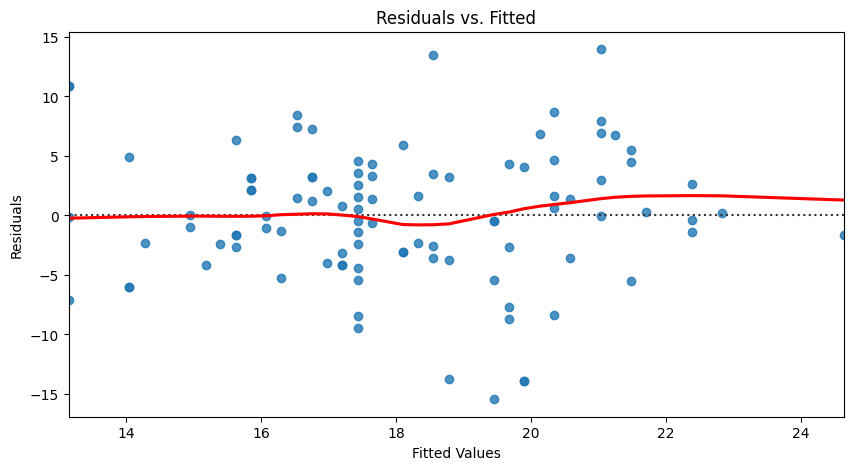

In [ ]:
residuals = model_multiple.resid
fitted = model_multiple.fittedvalues

plt.figure(figsize=(10, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()


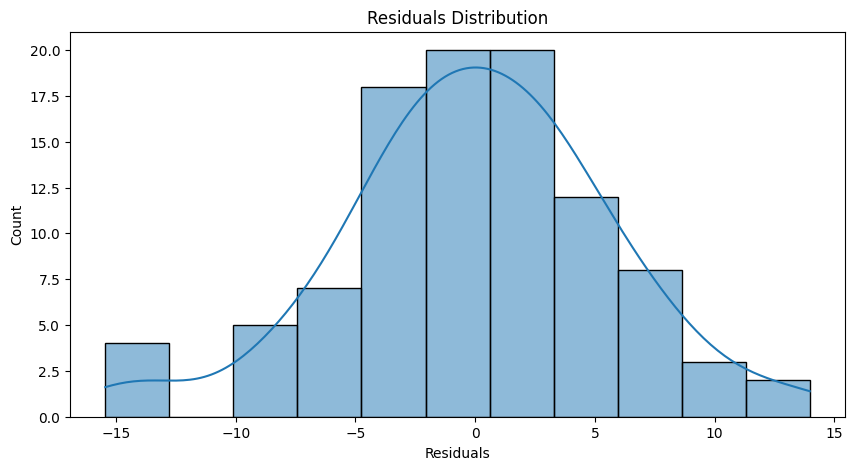

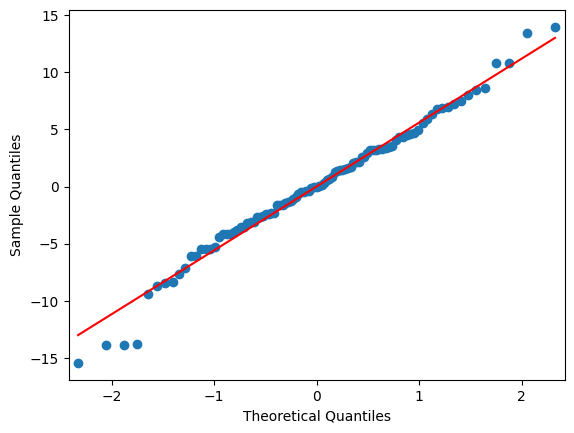

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.show()


In [ ]:
df = pd.read_csv('3 columns 2.csv')

In [ ]:
df.head()

,Gender,BSMAS Score,GAD-7 Score
0,Female,6,1
1,Female,8,0
2,Female,9,6
3,Female,9,2
4,Female,9,4


In [ ]:
# Convert 'BSMAS Score' and 'GAD-7 Score' to integers
df['BSMAS Score'] = df['BSMAS Score'].astype(int)
df['GAD-7 Score'] = df['GAD-7 Score'].astype(int)

# Check if the conversion is successful
print(df.dtypes)


Gender         object
BSMAS Score     int64
GAD-7 Score     int64
dtype: object


In [ ]:
# Assuming the data is already loaded into a DataFrame
# Convert columns to numeric if necessary
df['BSMAS Score'] = pd.to_numeric(df['BSMAS Score'], errors='coerce')
df['GAD-7 Score'] = pd.to_numeric(df['GAD-7 Score'], errors='coerce')

# Check if the columns were converted correctly
print(df.dtypes)

# Now let's do the correlation analysis again
# Overall Pearson and Spearman correlation
pearson_corr, pearson_p = stats.pearsonr(df['BSMAS Score'], df['GAD-7 Score'])
spearman_corr, spearman_p = stats.spearmanr(df['BSMAS Score'], df['GAD-7 Score'])

print(f"Pearson correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")
print(f"Spearman correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

# Correlation by gender
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

# Female correlation
pearson_corr_female, _ = stats.pearsonr(df_female['BSMAS Score'], df_female['GAD-7 Score'])
spearman_corr_female, _ = stats.spearmanr(df_female['BSMAS Score'], df_female['GAD-7 Score'])

# Male correlation
pearson_corr_male, _ = stats.pearsonr(df_male['BSMAS Score'], df_male['GAD-7 Score'])
spearman_corr_male, _ = stats.spearmanr(df_male['BSMAS Score'], df_male['GAD-7 Score'])

print(f"Female - Pearson correlation: {pearson_corr_female:.2f}")
print(f"Female - Spearman correlation: {spearman_corr_female:.2f}")

print(f"Male - Pearson correlation: {pearson_corr_male:.2f}")
print(f"Male - Spearman correlation: {spearman_corr_male:.2f}")


Gender         object
BSMAS Score     int64
GAD-7 Score     int64
dtype: object
Pearson correlation: 0.49, p-value: 0.0000
Spearman correlation: 0.47, p-value: 0.0000
Female - Pearson correlation: 0.59
Female - Spearman correlation: 0.54
Male - Pearson correlation: 0.38
Male - Spearman correlation: 0.35


In [ ]:
# Simple Linear Regression (BSMAS predicting GAD-7)
X_simple = sm.add_constant(df['BSMAS Score'])  # Add constant
y_simple = df['GAD-7 Score']

# Fit the model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Print the model summary
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:            GAD-7 Score   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.29
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.05e-07
Time:                        06:08:32   Log-Likelihood:                -288.85
No. Observations:                  99   AIC:                             581.7
Df Residuals:                      97   BIC:                             586.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5296      1.448     -1.747      

In [ ]:
# Encode 'Gender' as a binary variable (Male=0, Female=1)
df['Gender_Code'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Multiple Linear Regression (BSMAS + Gender predicting GAD-7)
X_multiple = df[['BSMAS Score', 'Gender_Code']]
X_multiple = sm.add_constant(X_multiple)
y_multiple = df['GAD-7 Score']

# Fit the model
model_multiple = sm.OLS(y_multiple, X_multiple).fit()

# Print the model summary
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:            GAD-7 Score   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     15.78
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.19e-06
Time:                        06:08:44   Log-Likelihood:                -288.62
No. Observations:                  99   AIC:                             583.2
Df Residuals:                      96   BIC:                             591.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8109      1.512     -1.860      

In [ ]:
# Create an interaction term between BSMAS and Gender
df['BSMAS_Gender_Interaction'] = df['BSMAS Score'] * df['Gender_Code']

# Multiple Regression with Interaction
X_interaction = df[['BSMAS Score', 'Gender_Code', 'BSMAS_Gender_Interaction']]
X_interaction = sm.add_constant(X_interaction)
y_interaction = df['GAD-7 Score']

# Fit the model
model_interaction = sm.OLS(y_interaction, X_interaction).fit()

# Print the model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:            GAD-7 Score   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     11.28
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.15e-06
Time:                        06:08:57   Log-Likelihood:                -287.61
No. Observations:                  99   AIC:                             583.2
Df Residuals:                      95   BIC:                             593.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

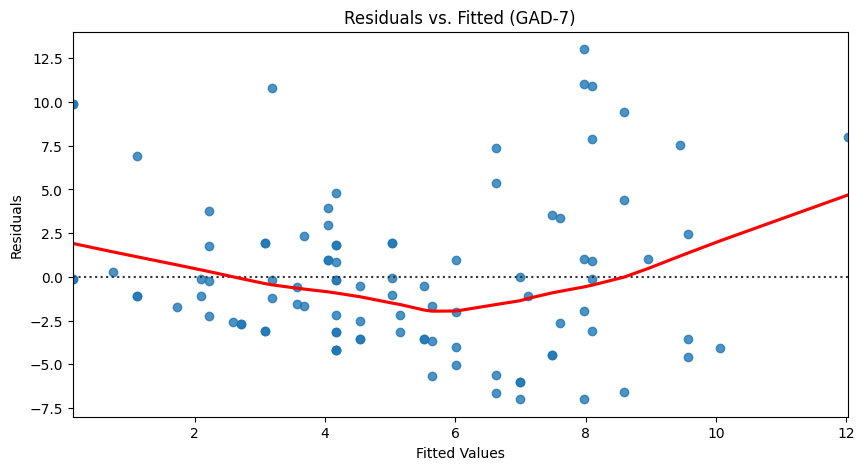

In [ ]:
# Residuals vs. Fitted Plot for Multiple Regression
residuals = model_multiple.resid
fitted = model_multiple.fittedvalues

plt.figure(figsize=(10, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted (GAD-7)')
plt.show()


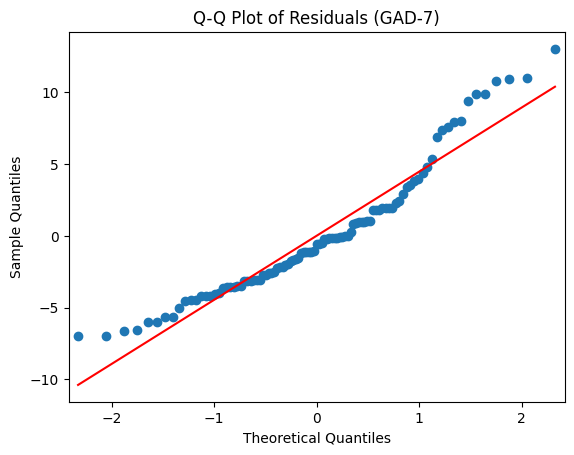

In [ ]:
# Q-Q Plot for residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals (GAD-7)')
plt.show()


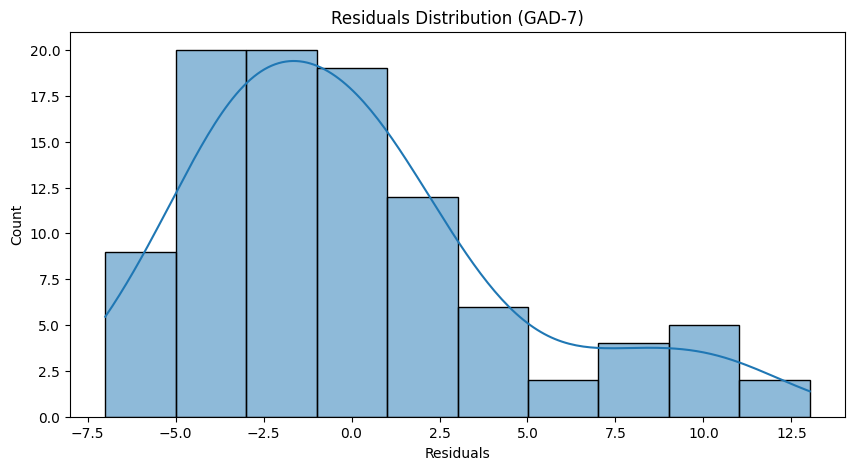

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (GAD-7)')
plt.xlabel('Residuals')
plt.show()
